# Linear Regression

This code reproduces the lecture example to predict $y$ from $x$ using Gradient Descent.

In [6]:
from google.colab import files
print("Please upload the files Salary_data.csv and play_tennis.csv")
uploaded = files.upload()

Please upload the files Salary_data.csv and play_tennis.csv


Saving play_tennis.csv to play_tennis.csv
Saving Salary_Data.csv to Salary_Data.csv


In [3]:
import numpy as np

# 1. Training data (x, y)
training_data = [
    (1, 1),
    (2, 3),
    (4, 3)
]

# 2. Feature extractor (adds the bias term)
def phi(x):
    # Returns [1, x] as the feature vector
    return np.array([1, x])

# 3. Loss Function (Mean Squared Error)
def trainLoss(w):
    N = len(training_data)
    # Sum of (w*phi(x) - y)^2
    loss = sum((np.dot(w, phi(x)) - y)**2 for x, y in training_data)
    return loss / N

# 4. Gradient of the Loss Function
def gradientTrainLoss(w):
    N = len(training_data)
    # Sum of 2 * (w*phi(x) - y) * phi(x)
    grad = sum(2 * (np.dot(w, phi(x)) - y) * phi(x) for x, y in training_data)
    return grad / N

# 5. Gradient Descent Algorithm
def gradientDescent(F, gradF, w0):
    w = w0.copy()
    eta = 0.1  # Learning rate
    epochs = 500

    print(f"Initial: w={w}, F(w)={F(w):.4f}")

    for epoch in range(epochs):
        gradient = gradF(w)
        w -= eta * gradient
        # Print every 100 epochs
        if epoch % 100 == 99 or epoch == epochs - 1:
            print(f'Epoch {epoch + 1}: w={w}, F(w)={F(w):.4f}, gradF={gradient}')

    return w

# 6. Execute the training
print("--- Start of Training (Tutorial 1) ---")
w0 = np.zeros(2)
w_final = gradientDescent(trainLoss, gradientTrainLoss, w0)
print(f"Final weights: {w_final}")

# 7. Make a prediction
x_input = 10
y_pred = np.dot(w_final, phi(x_input))
print(f'Prediction for x={x_input}: y={y_pred:.3f}')

--- Start of Training (Tutorial 1) ---
Initial: w=[0. 0.], F(w)=6.3333
Epoch 100: w=[0.98771706 0.57564294], F(w)=0.3810, gradF=[-0.00510231  0.00175064]
Epoch 200: w=[0.99979024 0.57150054], F(w)=0.3810, gradF=[-8.71325106e-05  2.98958397e-05]
Epoch 300: w=[0.99999642 0.5714298 ], F(w)=0.3810, gradF=[-1.48796911e-06  5.10533733e-07]
Epoch 400: w=[0.99999994 0.57142859], F(w)=0.3810, gradF=[-2.54101717e-08  8.71842717e-09]
Epoch 500: w=[1.         0.57142857], F(w)=0.3810, gradF=[-4.33931705e-10  1.48885052e-10]
Final weights: [1.         0.57142857]
Prediction for x=10: y=6.714


### Exercise I: Univariate Linear Model for Regression (Salaries)

This exercise uses sklearn to predict salaries based on years of experience.


--- Exercise I: Salary Prediction ---
X_train dimension: (20, 1)
X_test dimension: (10, 1)


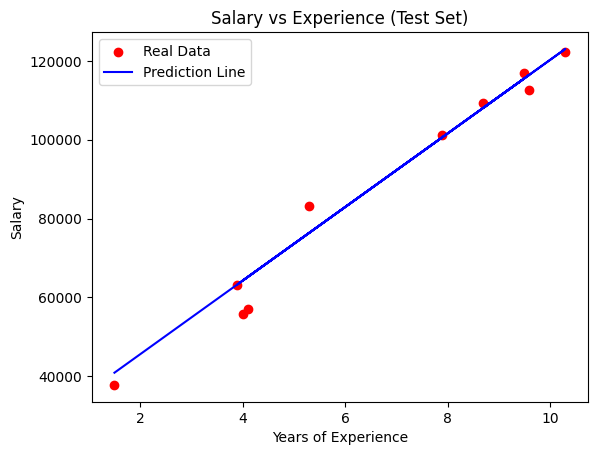

Root Mean Square Error (RMSE): 4585.42
Relative RMSE (RRMSE): 5.33%


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("\n--- Exercise I: Salary Prediction ---")

# 1. Load data
try:
    dataset = pd.read_csv('Salary_Data.csv')
    X = dataset.iloc[:, :-1].values  # YearsExperience (Feature)
    y = dataset.iloc[:, 1].values    # Salary (Target)

    # 2. Split into training and test sets (1/3 for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
    print(f"X_train dimension: {X_train.shape}")
    print(f"X_test dimension: {X_test.shape}")

    # 3. Train the model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # 4. Predict
    y_pred = regressor.predict(X_test)

    # 5. Visualize results
    plt.scatter(X_test, y_test, color='red', label='Real Data')
    plt.plot(X_test, y_pred, color='blue', label='Prediction Line')
    plt.title('Salary vs Experience (Test Set)')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show() #

    # 6. Evaluation (RMSE and RRMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rrmse = rmse / np.mean(y_test)

    print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
    print(f"Relative RMSE (RRMSE): {rrmse:.2%}")

except FileNotFoundError:
    print("Error: The file 'Salary_data.csv' was not found. Please upload it.")

## Part II: Linear Classification

### Tutorial 2: Binary Linear Classification with Hinge Loss
Manual implementation of a linear classifier for the Tennis dataset.

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

print("\n--- Tutorial 2: Tennis Classification (Hinge Loss) ---")

try:
    # 1. Load and prepare data
    dataset_tennis = pd.read_csv('play_tennis.csv')

    # Replace No/Yes with -1/1 for classification
    dataset_tennis['PlayTennis'].replace(['No', 'Yes'], [-1, 1], inplace=True)

    # Define X (Temperature, Humidity) and y (PlayTennis)
    # Assuming columns are: Day, Outlook, Temperature, Humidity, Wind, PlayTennis
    # X corresponds to columns 2 and 3 (Temperature and Humidity)
    X = dataset_tennis.iloc[:, 2:4].values
    y = dataset_tennis.iloc[:, 5].values

    # 2. Normalization (Min-Max)
    X_norm = np.copy(X).astype(float)
    for j in range(X.shape[1]):
        min_j = np.min(X[:, j])
        max_j = np.max(X[:, j])
        X_norm[:, j] = (X[:, j] - min_j) / (max_j - min_j)

    # 3. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

    # 4. Helper Functions
    def phi(x):
        # Feature vector (no bias term needed for this specific implementation if we use x directly)
        return np.array(x)

    def predict(w, x):
        return np.sign(np.dot(w, phi(x)))

    def hinge_loss(w, x, y):
        return max(0, 1 - y * np.dot(w, phi(x)))

    def train_loss(w, X_data, y_data):
        loss = 0
        for i in range(len(X_data)):
            loss += hinge_loss(w, X_data[i], y_data[i])
        return loss / len(X_data)

    def gradient_train_loss(w, X_data, y_data):
        gradient = np.zeros(len(w))
        for i in range(len(X_data)):
            # Gradient is only non-zero when the loss is positive
            if hinge_loss(w, X_data[i], y_data[i]) > 0:
                gradient += -y_data[i] * phi(X_data[i])
            # Else, gradient is 0 for that sample
        return gradient / len(X_data)

    # 5. Gradient Descent
    learning_rate = 0.1
    num_iterations = 100
    w = np.zeros(2) # Initialization of weights (for Temperature and Humidity)

    for i in range(num_iterations):
        grad = gradient_train_loss(w, X_train, y_train)
        w -= learning_rate * grad

    print(f"Final weights w: {w}")

    # 6. Evaluation
    predictions = [predict(w, x) for x in X_test]

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\nClassification Report:")
    print(classification_report(y_test, predictions, zero_division=0))

except FileNotFoundError:
    print("Error: The file 'play_tennis.csv' was not found.")
except Exception as e:
    print(f"An error occurred while processing the tennis data: {e}")


--- Tutorial 2: Tennis Classification (Hinge Loss) ---


/tmp/ipython-input-4004126704.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_tennis['PlayTennis'].replace(['No', 'Yes'], [-1, 1], inplace=True)
/tmp/ipython-input-4004126704.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_tennis['PlayTennis'].replace(['No', 'Yes'], [-1, 1]

Final weights w: [0.52056665 0.68356375]

Confusion Matrix:
[[ 0 55]
 [ 0 65]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        55
           1       0.54      1.00      0.70        65

    accuracy                           0.54       120
   macro avg       0.27      0.50      0.35       120
weighted avg       0.29      0.54      0.38       120



## Exercise 2: Multi-class Classification (Iris Dataset)

In [10]:
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, hinge_loss
import numpy as np

print("\n--- Exercise 2: Iris Classification (LinearSVC) ---")

# 1. Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print(f"Class names: {target_names}")

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Create and Train Classifier (LinearSVC with hinge loss)
# Note: max_iter is increased to ensure convergence, as per best practice for LinearSVC
clf = svm.LinearSVC(loss='hinge', random_state=0, max_iter=10000)
clf.fit(X_train, y_train)

# 4. Visualize decision_function (first 5 raw output values)
decision_values = clf.decision_function(X_test)
print("\nFirst 5 raw decision_function output values:")
# Each row has 3 values, one score for each class (Setosa, Versicolor, Virginica)
print(decision_values[:5])

# 5. Calculate mean Hinge Loss on the test set
# The hinge_loss function in sklearn expects the true targets and the decision values.
mean_hinge_loss = hinge_loss(y_test, decision_values).mean()
print(f"\nMean Hinge Loss (test set): {mean_hinge_loss:.4f}")

# 6. Predict classes
y_pred = clf.predict(X_test)
print("\nFirst 10 Predicted labels:")
print(y_pred[:10])

# 7. Evaluation
print("\nConfusion Matrix (Iris):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Iris):")
print(classification_report(y_test, y_pred, target_names=target_names))

# 8. New Prediction (Example)
# Input features for a new sample (e.g., [sepal length, sepal width, petal length, petal width])
new_data = np.array([[5.1, 3.5, 1.4, 0.2], [6.0, 3.0, 4.0, 1.0]])
new_pred_labels = clf.predict(new_data)
new_pred_names = [target_names[label] for label in new_pred_labels]

print("\nPrediction for new samples:")
for data, name in zip(new_data, new_pred_names):
    print(f"Features {data} -> Predicted Class: {name}")


--- Exercise 2: Iris Classification (LinearSVC) ---
Class names: ['setosa' 'versicolor' 'virginica']

First 5 raw decision_function output values:
[[-3.64378069 -1.25838373  2.38192482]
 [-1.79071254  0.02947912 -1.80210766]
 [ 1.93099831 -1.73470047 -9.76005702]
 [-4.01962501 -0.44102841  1.78129329]
 [ 1.38029523 -1.14028007 -8.08644427]]

Mean Hinge Loss (test set): 0.3185

First 10 Predicted labels:
[2 1 0 2 0 2 0 1 1 1]

Confusion Matrix (Iris):
[[16  0  0]
 [ 0 11  7]
 [ 0  0 11]]

Classification Report (Iris):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.61      0.76        18
   virginica       0.61      1.00      0.76        11

    accuracy                           0.84        45
   macro avg       0.87      0.87      0.84        45
weighted avg       0.90      0.84      0.84        45


Prediction for new samples:
Features [5.1 3.5 1.4 0.2] -> Predicted Class: setosa
Features [6.

## Explanations